<H2 style="color:blue; text-align: center;"> Data Analytics with Python</H2>
<H3 style="color:green; text-align: center;"> Lecture 7 (MDM)</H3>
<H4 style="color:Magenta; text-align: center;"> By Ajit Kumar (ICT Mumbai)</H4>
<H4 style="color:Maroon; text-align: center;"> Jan. 30, 2025</H4>
<HR style="height:2px;size:30;background-color:Olive"></HR>

## Exploring health data
(Linking alcohol and drug-dependent adults to primary medical care: A randomized controlled trial of a multi-disciplinary health intervention in a detoxification unit)

In [1]:
import pandas as pd

In [2]:
## Health Evaluation and Linkage to Primary Health Care data
mydata = pd.read_csv('HELPrct.csv') 

In [3]:
mydata.shape

(453, 31)

In [4]:
mydata.columns

Index(['Unnamed: 0', 'age', 'anysubstatus', 'anysub', 'cesd', 'd1',
       'daysanysub', 'dayslink', 'drugrisk', 'e2b', 'female', 'sex', 'g1b',
       'homeless', 'i1', 'i2', 'id', 'indtot', 'linkstatus', 'link', 'mcs',
       'pcs', 'pss_fr', 'racegrp', 'satreat', 'sexrisk', 'substance', 'treat',
       'avg_drinks', 'max_drinks', 'hospitalizations'],
      dtype='object')

**Data Set:** Each row (case) is a patient, and each column is a variable describing that
patient. Variables have different types. The age, cesd (depression
score), mcs (mental health score), and pcs (physical health score) are
all numerical (quantitative) variables. The homeless, sex, and
substance are all categorical (qualitative) variables (labels).

-  'age': at baseline (in years)
- 'anysub': use of any substance post-detox: a factor with levels no yes
- 'cesd': Center for Epidemiologic Studies Depression measure at baseline (high scores indicate more depressive symptoms)
- 'd1':lifetime number of hospitalizations for medical problems (measured at baseline)

- 'hospitalizations':lifetime number of hospitalizations for medical problems (measured at baseline)

- 'daysanysub':time (in days) to first use of any substance post-detox

- 'dayslink':time (in days) to linkage to primary care

- 'drugrisk':Risk Assessment Battery drug risk scale at baseline

- 'e2b':number of times in past 6 months entered a detox program (measured at baseline)

- 'female':0 for male, 1 for female

- 'sex': a factor with levels male female

- 'g1b':experienced serious thoughts of suicide in last 30 days (measured at baseline): a factor with levels no yes

- 'homeless: housing status: a factor with levels housed homeless

- 'i1': average number of drinks (standard units) consumed per day, in the past 30 days (measured at baseline)

- 'i2': maximum number of drinks (standard units) consumed per day, in the past 30 days (measured at baseline)

- 'id':subject identifier

- 'indtot': Inventory of Drug Use Consequences (InDUC) total score (measured at baseline)

- 'linkstatus': post-detox linkage to primary care (0 = no, 1 = yes)

- link" post-detox linkage to primary care: no yes

- 'mcs': SF-36 Mental Component Score (measured at baseline, lower scores indicate worse status)

- 'pcs:'SF-36 Physical Component Score (measured at baseline, lower scores indicate worse status)

- 'pss\_fr':perceived social support by friends (measured at baseline, higher scores indicate more support)

- 'racegrp':race/ethnicity: levels black hispanic other white

- 'satreat':any BSAS substance abuse treatment at baseline: no yes

- 'sexrisk': Risk Assessment Battery sex risk score (measured at baseline)

- 'substance': primary substance of abuse: alcohol cocaine heroin

- 'treat': randomized to HELP clinic: no yes

In [95]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        453 non-null    int64  
 1   age               453 non-null    int64  
 2   anysubstatus      246 non-null    float64
 3   anysub            246 non-null    object 
 4   cesd              453 non-null    int64  
 5   d1                453 non-null    int64  
 6   daysanysub        244 non-null    float64
 7   dayslink          431 non-null    float64
 8   drugrisk          452 non-null    float64
 9   e2b               214 non-null    float64
 10  female            453 non-null    int64  
 11  sex               453 non-null    object 
 12  g1b               453 non-null    object 
 13  homeless          453 non-null    object 
 14  i1                453 non-null    int64  
 15  i2                453 non-null    int64  
 16  id                453 non-null    int64  
 1

In [96]:
mydata.head(20)

,Unnamed: 0,age,anysubstatus,anysub,cesd,d1,daysanysub,dayslink,drugrisk,e2b,...,pcs,pss_fr,racegrp,satreat,sexrisk,substance,treat,avg_drinks,max_drinks,hospitalizations
0,1,37,1.0,yes,49,3,177.0,225.0,0.0,NaN,...,58.413689,0,black,no,4,cocaine,yes,13,26,3
1,2,37,1.0,yes,30,22,2.0,NaN,0.0,NaN,...,36.036942,1,white,no,7,alcohol,yes,56,62,22
2,3,26,1.0,yes,39,0,3.0,365.0,20.0,NaN,...,74.806328,13,black,no,2,heroin,no,0,0,0
3,4,39,1.0,yes,15,2,189.0,343.0,0.0,1.0,...,61.931679,11,white,yes,4,heroin,no,5,5,2
4,5,32,1.0,yes,39,12,2.0,57.0,0.0,1.0,...,37.345585,10,black,no,6,cocaine,no,10,13,12
5,6,47,1.0,yes,6,1,31.0,365.0,0.0,NaN,...,46.475212,5,black,no,5,cocaine,yes,4,4,1
6,7,49,NaN,NaN,52,14,NaN,334.0,0.0,1.0,...,24.515039,1,black,yes,8,cocaine,no,13,20,14
7,8,28,1.0,yes,32,1,47.0,365.0,7.0,8.0,...,65.138008,4,white,yes,6,alcohol,yes,12,24,1
8,9,50,1.0,yes,50,14,31.0,365.0,18.0,7.0,...,38.270878,5,white,no,8,alcohol,no,71,129,14
9,10,39,1.0,yes,46,4,115.0,382.0,20.0,3.0,...,22.610598,0,white,yes,0,heroin,yes,20,27,4


In [97]:
mydata.isnull().sum()

Unnamed: 0            0
age                   0
anysubstatus        207
anysub              207
cesd                  0
d1                    0
daysanysub          209
dayslink             22
drugrisk              1
e2b                 239
female                0
sex                   0
g1b                   0
homeless              0
i1                    0
i2                    0
id                    0
indtot                0
linkstatus           22
link                 22
mcs                   0
pcs                   0
pss_fr                0
racegrp               0
satreat               0
sexrisk               0
substance             0
treat                 0
avg_drinks            0
max_drinks            0
hospitalizations      0
dtype: int64

<AxesSubplot: xlabel='mcs', ylabel='cesd'>

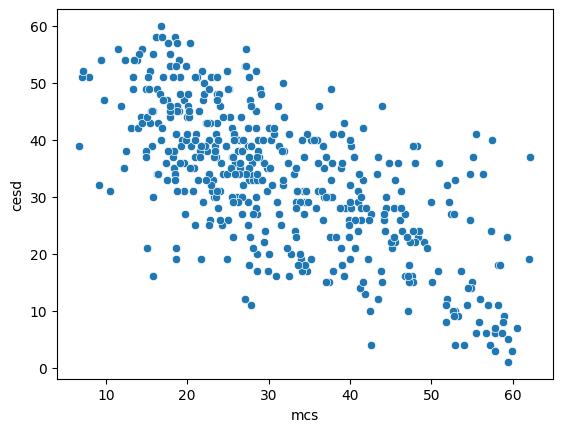

In [11]:
import seaborn as sns
sns.scatterplot(data=mydata, x="mcs", y="cesd")

<AxesSubplot: xlabel='cesd'>

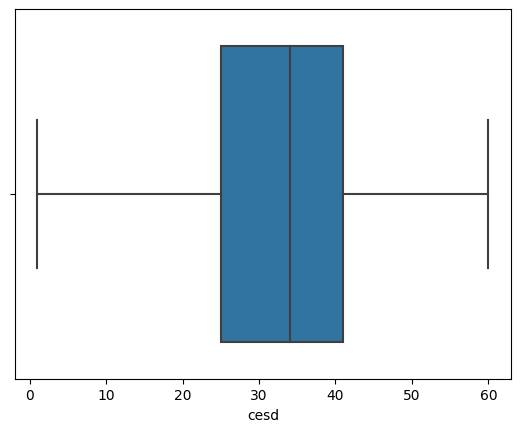

In [18]:
sns.boxplot(data=mydata, x="cesd")

alcohol    177
cocaine    152
heroin     124
Name: substance, dtype: int64


<AxesSubplot: >

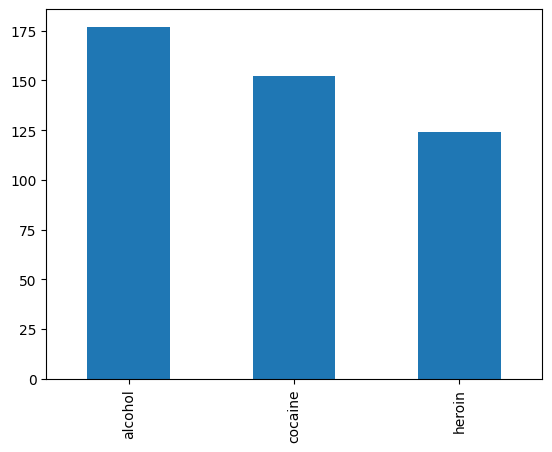

In [21]:
mytable = mydata['substance'].value_counts()
print(mytable)
mytable.plot.bar()

substance  alcohol  cocaine  heroin
homeless                           
homeless       103       59      47
housed          74       93      77 

substance  alcohol  cocaine  heroin  All
homeless                                
homeless       103       59      47  209
housed          74       93      77  244
All            177      152     124  453 



<AxesSubplot: xlabel='homeless'>

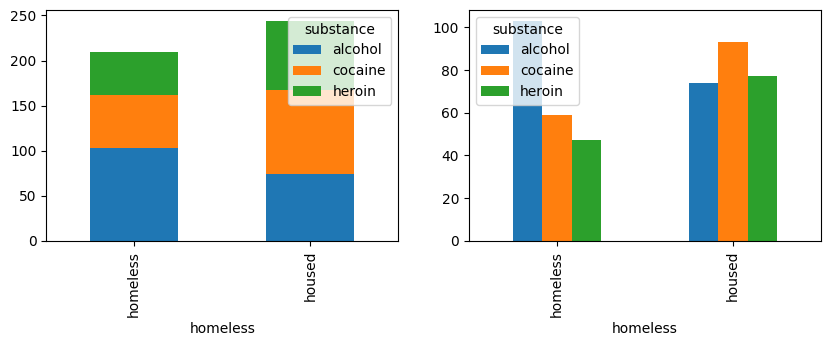

In [22]:
O = pd.crosstab(mydata.homeless, mydata.substance, margins=False)
Om = pd.crosstab(mydata.homeless, mydata.substance, margins=True)
print(O, '\n')
print(Om, '\n')
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=False)
O.plot.bar(stacked=True,ax=axes[0])
O.plot.bar(stacked=False,ax=axes[1])


<AxesSubplot: xlabel='sex', ylabel='cesd'>

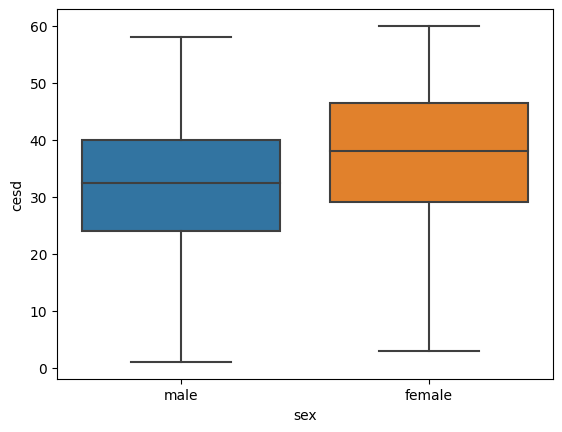

In [23]:
sns.boxplot(data=mydata,x='sex',y='cesd')


<AxesSubplot: xlabel='cesd', ylabel='Density'>

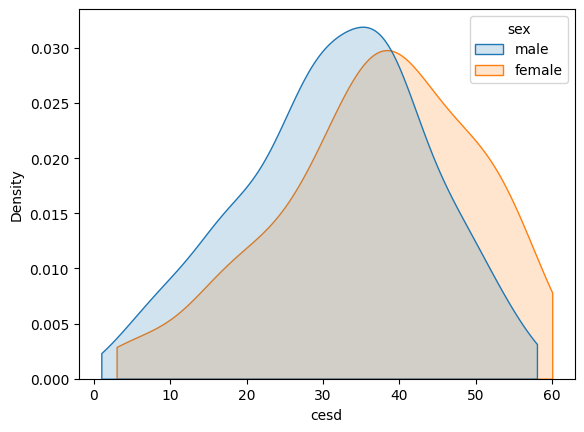

In [24]:
sns.kdeplot(data=mydata, x="cesd", hue="sex", cut=0, fill=True,
common_norm=False, alpha=0.2)

## Probability Distributions

### Normal Distribution
$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right), \quad -\infty < x < \infty
$$
where $\mu$ is the mean and $\sigma^2$ is the variance. 

In [28]:
from scipy.stats import norm; 
import numpy as np
# explore norm.pdf,norm.cdf,
# Percent point function (inverse of `cdf`) at q of the given RV. norm.ppf
# Survival function (1 - `cdf`) at x of the given RV. norm.sf?
# Inverse survival function (inverse of `sf`) at q of the given RV. norm.isf?

[]

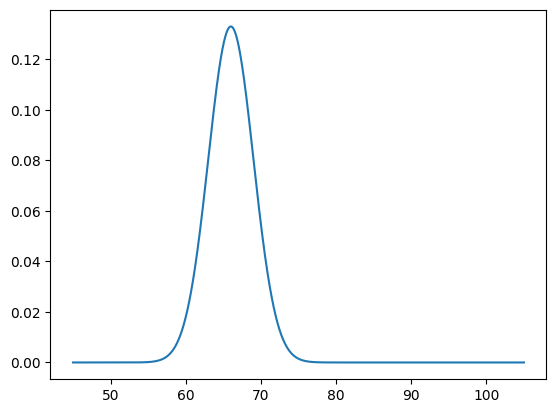

In [29]:
mu = 75
sig = 10
x = np.arange(mu-3*sig, mu+3*sig, 0.01)
#define multiple normal distributions
plt.plot(x, norm.pdf(x, 66, 3), label=': 66, : 3')
plt.plot()

In [30]:
norm.pdf(65,mu,sig)

0.024197072451914336

In [31]:
p = norm.cdf(65,mu,sig)
print(p)

0.15865525393145707


In [32]:
norm.ppf(p,mu,sig)

65.0

In [33]:
q = norm.sf(65,mu,sig)
print(q)
q == 1-p

0.8413447460685429


True

In [34]:
norm.isf(q,mu,sig)

65.0

In [35]:
## Generating random noumbers following normal random distributions
norm.rvs(mu,sig,size=100)

array([68.00476128, 71.0753633 , 71.54624414, 77.47581361, 90.19177579,
       72.02547757, 71.08839384, 78.01280617, 84.66292082, 63.19820261,
       65.66629825, 78.94612792, 59.95608192, 83.43920936, 67.89516362,
       97.4897886 , 72.22873879, 68.52708743, 96.85831543, 67.23286058,
       72.00748995, 74.7546994 , 76.90912052, 67.27645621, 91.98485732,
       87.44764705, 84.62155686, 59.62191987, 61.2968748 , 74.34141746,
       72.36940895, 91.57529735, 79.06852706, 76.33698226, 65.6603252 ,
       83.41559749, 59.82287157, 96.17757586, 75.08140259, 71.66899031,
       64.73520226, 74.7047738 , 69.56036385, 71.81424176, 77.0434535 ,
       85.11049469, 77.59920426, 56.06709835, 57.6917126 , 67.16143414,
       81.47599477, 87.42105421, 86.21602619, 75.13199277, 74.55988584,
       75.58838923, 76.90722523, 65.20238561, 79.3147614 , 80.68427975,
       86.40905904, 86.1645331 , 85.66485971, 68.97529589, 89.13546671,
       70.60111602, 75.08273335, 80.20834262, 79.66319658, 68.51

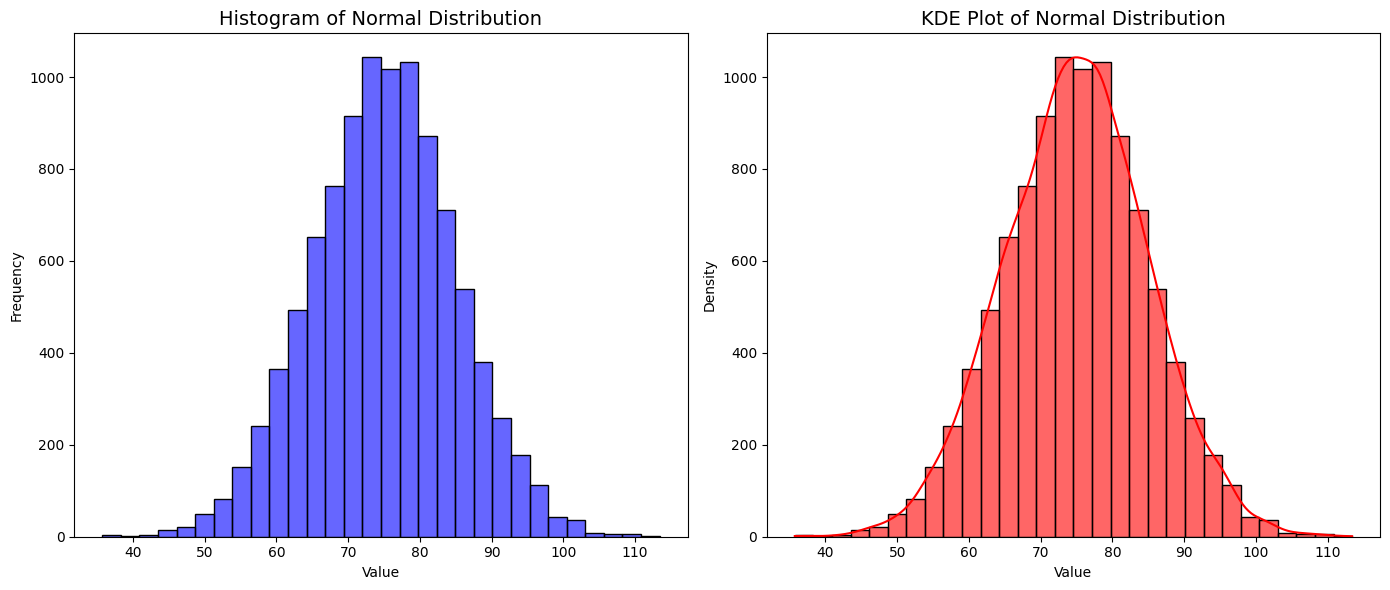

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = np.random.normal(mu, sig, 10000)  # Generate 10000 random samples
# Create subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram on the first axis
sns.histplot(data, bins=30, kde=False, color='blue', edgecolor='black', alpha=0.6, ax=axes[0])
axes[0].set_title('Histogram of Normal Distribution', fontsize=14)
axes[0].set_xlabel('Value', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)

# Plot KDE on the second axis
sns.histplot(data, bins=30, kde=True, color='red', edgecolor='black', alpha=0.6, ax=axes[1])
axes[1].set_title('KDE Plot of Normal Distribution', fontsize=14)
axes[1].set_xlabel('Value', fontsize=10)
axes[1].set_ylabel('Density', fontsize=10)

# Display the plots
plt.tight_layout()
plt.show()

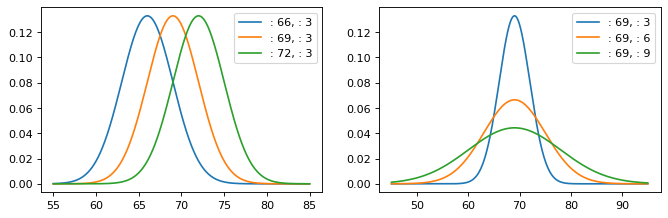

In [37]:
import numpy as np; import matplotlib.pyplot as plt
from scipy.stats import norm; from matplotlib.pyplot import figure
figure(figsize=(10, 3), dpi=80)
plt.subplot(1, 2, 1)
x = np.arange(55, 85, 0.01)
#define multiple normal distributions
plt.plot(x, norm.pdf(x, 66, 3), label=': 66, : 3')
plt.plot(x, norm.pdf(x, 69, 3), label=': 69, : 3')
plt.plot(x, norm.pdf(x, 72, 3), label=': 72, : 3')
plt.legend()
plt.subplot(1, 2, 2)
x = np.arange(45, 95, 0.01)
#define multiple normal distributions
plt.plot(x, norm.pdf(x, 69, 3), label=': 69, : 3')
plt.plot(x, norm.pdf(x, 69, 6), label=': 69, : 6')
plt.plot(x, norm.pdf(x, 69, 9), label=': 69, : 9')
plt.legend()
plt.show()

0.9973002039367398


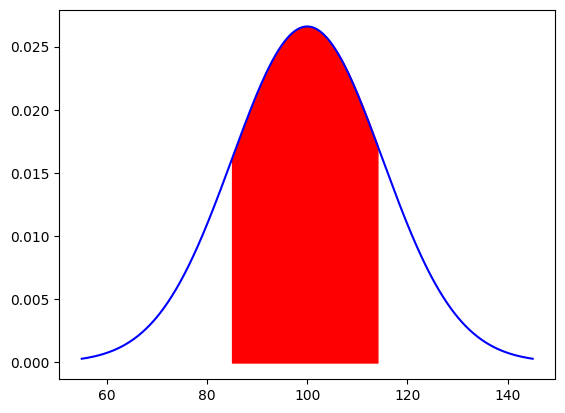

In [38]:
import numpy as np; import matplotlib.pyplot as plt;
from scipy.stats import norm;
mu=100; sig=15
x=np.linspace(mu-3*sig, mu+3*sig,1000)
print(norm.cdf(mu+3*sig,mu,sig)-norm.cdf(mu-3*sig,mu,sig))
plt.plot(x,norm.pdf(x,loc=mu,scale=sig),'b')
px=np.arange(85,115,1)
plt.fill_between(px,norm.pdf(px,loc=mu,scale=sig),color='r')
plt.show()

## Binomial Distribution
$$P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}, \quad k = 0, 1, 2, \dots, n
$$
where $n$ is number of trials and $p$ is the probability of success in each trial.


In [52]:
from scipy.stats import binom
n = 25; p = 0.65
k=20
p1 = binom.pmf(k,n=n,p=p); print('p1 = {:.4f}'.format(p1))

p1 = 0.0506


In [50]:
binom.cdf(k,n,p)

0.96795161630455

In [45]:
binom.cdf(25,n,p)

1.0

<BarContainer object of 26 artists>

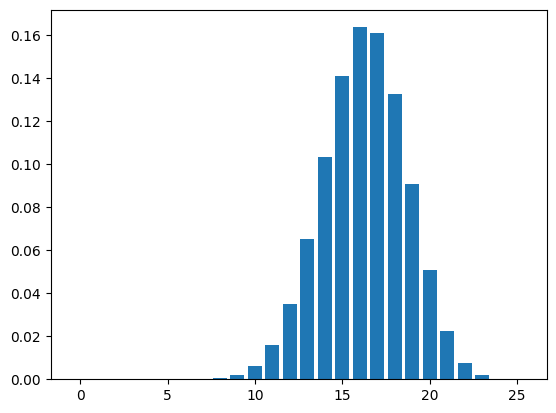

In [53]:
import matplotlib.pyplot as plt; import numpy as np
kv = np.arange(n+1);
pv = binom.pmf(k=kv,n=25,p=0.65);
plt.bar(kv, pv)

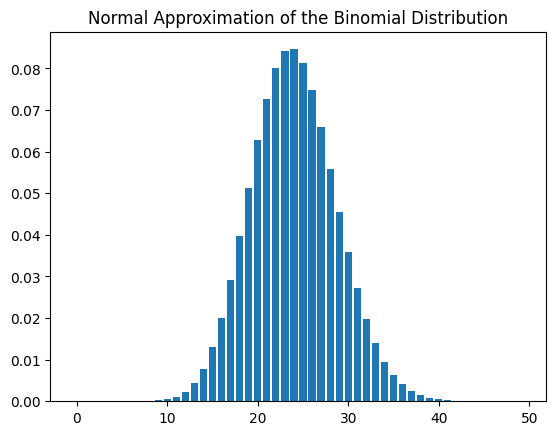

In [57]:
from scipy.stats import binom; import pandas as pd;
import matplotlib.pyplot as plt; import numpy as np;
n = 300; p = 0.08; # n*p = 24
kv = np.arange(50);
pv = binom.pmf(k=kv,n=n,p=p);
plt.bar(kv, pv)
plt.title('Normal Approximation of the Binomial Distribution')
plt.show()

## Chi-square distribution
$$f(x; k) = \frac{x^{\frac{k}{2} - 1} e^{-\frac{x}{2}}}{2^{\frac{k}{2}} \Gamma(\frac{k}{2})}, \quad x > 0$$
where $ \Gamma(\cdot) $ is the Gamma function.


The Chi-Square distribution is a special case of the Gamma distribution:

$$
X \sim \Gamma\left(\frac{k}{2}, \frac{1}{2}\right)
$$

where the Gamma distribution has the probability density function:

$$
f(x; \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x}, \quad x > 0
$$

with shape parameter $\alpha = k/2 $ and scale parameter $ \beta = 1/2 $.

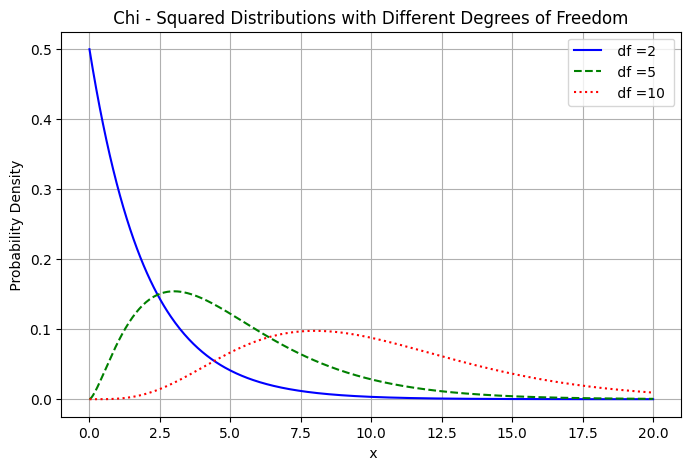

In [58]:
import numpy as np; import matplotlib. pyplot as plt
from scipy.stats import chi2
# Parameters for the chi - squared distributions
df_values = [2, 5, 10] # Degrees of freedom
x = np. linspace (0, 20, 500) # x - values for the plots
# Line styles and colors for the distributions
linestyles = ['-', '--', ':']; colors = ['blue', 'green', 'red']
# Plotting the chi - squared distributions
plt. figure (figsize =(8, 5) )
for df, ls, color in zip (df_values, linestyles, colors ):
    y = chi2. pdf (x, df ) # Compute the PDF of the chi - squared distribution
    plt. plot (x, y, linestyle =ls, color = color, label =f" df ={ df } ")
# Add title, labels, legend, and grid
plt.title (" Chi - Squared Distributions with Different Degrees of Freedom " )
plt.xlabel (" x"); plt. ylabel (" Probability Density ")
plt.legend (); plt. grid (True ); plt. show ()


## Student's t-distribution

$$f(x; k) = \frac{x^{\frac{k}{2} - 1} e^{-\frac{x}{2}}}{2^{\frac{k}{2}} \Gamma(\frac{k}{2})}, \quad x > 0$$

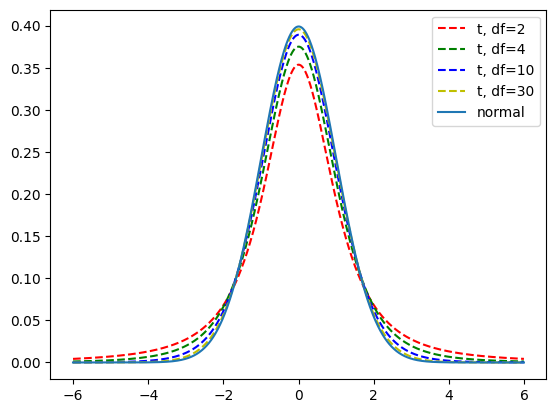

In [59]:
from scipy.stats import norm, t; import pandas as pd;
import matplotlib.pyplot as plt; import numpy as np;
xv = np.arange(-6,6,0.01)
dv = t.pdf(x=xv,df = 2)
plt.plot(xv,dv,'r--',label='t, df=2')
dv = t.pdf(x=xv,df = 4)
plt.plot(xv,dv,'g--',label='t, df=4')
dv = t.pdf(x=xv,df = 10)
plt.plot(xv,dv,'b--',label='t, df=10')
dv = t.pdf(x=xv,df = 30)
plt.plot(xv,dv,'y--',label='t, df=30')
dv = norm.pdf(x=xv)
plt.plot(xv,dv,label='normal')
plt.legend()

## Chi-square test

$$\chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$

where:
- $ O_{ij} $ is the observed frequency,
- $ E_{ij} $ is the expected frequency,
- $ r $ is the number of rows,
- $ c $ is the number of columns.

The above $\chi^2$ follows the chi-square distribution of degree of freedom $df = (r - 1) \times (c - 1)$.

* If $\chi^2 > \chi^2_{\alpha, df}$, then  reject $H_0$ at sigificance level $\alpha$.
* If $\chi^2 \leq  \chi^2_{\alpha, df}$, then fails to reject $H_0$ at sigificance level $\alpha$.

$$P\text{-value} = P(\chi^2 \geq \chi^2_{\text{observed}} \mid H_0 \text{ is true})$$
- If $\text{P-value} \leq \alpha $, reject $H_0$.
- If $ \text{P-value} > \alpha$, fail to reject $ H_0$.


In [69]:
import pandas as pd; from scipy.stats import chi2_contingency;
from scipy.stats import chi2

**Example:** A supplement company claims that their extract is effective in
preventing common cold viruses. Healthy volunteers randomized
into groups were given a placebo, low dose, or high dose of the
supplement and exposed to a cold virus. Test the claim that getting a cold
infection is independent of the treatment group (i.e., row and column
variables are independent) at a 5% level.

In [65]:
O = pd.DataFrame({'Placebo':[10,40], 'LowDose':[28,60], 'HighDose':
[31,64]},
index= ['Infected','NotInfected'])
O

,Placebo,LowDose,HighDose
Infected,10,28,31
NotInfected,40,60,64


### Chi-square example for test of independence
A marketing study of shopping habits by social class produced the
data below. Investigate if the brand choice is independent of the
social class (i.e., row and column variables are independent). 

In [88]:
O = pd.DataFrame({'Upper Class':[130,30,20,20], 'Middle Class':[100,400,60,40],
'Low Class':[70,70,20,40]},index= ['Brand A','Brand B','Brand C','Brand D'])
O

,Upper Class,Middle Class,Low Class
Brand A,130,100,70
Brand B,30,400,70
Brand C,20,60,20
Brand D,20,40,40


<AxesSubplot: >

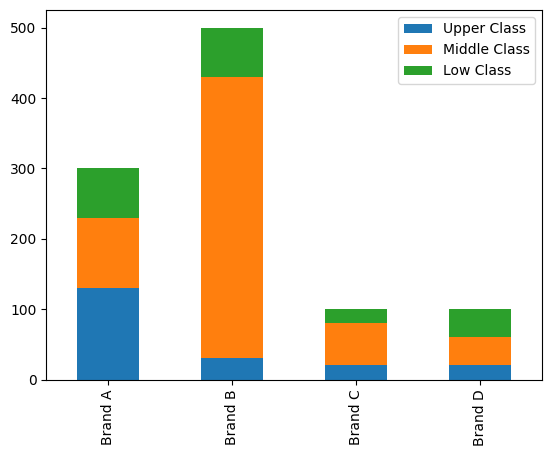

In [87]:
O.plot.bar(stacked=True)

In [72]:
nr = O.shape[0]; nc = O.shape[1];

In [73]:
nr = Observed.shape[0]; nc = Observed.shape[1];

In [74]:
Om = pd.DataFrame.copy(O) # creating margins
Om['Sum'] = O.sum(axis=1)
rowsum = O.sum(axis=1)
colsum = O.sum(axis=0)
Om.loc[len(Om.index)] = colsum.tolist() + [O.sum().sum()]
print(Om)
print('nr, nc = ', nr,nc)

         Upper Class  Middle Class  Low Class   Sum
Brand A          130           100         70   300
Brand B           30           400         70   500
Brand C           20            60         20   100
Brand D           20            40         40   100
4                200           600        200  1000
nr, nc =  2 3


In [76]:
chi_val, p_val, dof, E = chi2_contingency(O,correction=False)

In [79]:
chi_val,p_val,dof,E

(236.88888888888889,
 2.5915746259046334e-48,
 6,
 array([[ 60., 180.,  60.],
        [100., 300., 100.],
        [ 20.,  60.,  20.],
        [ 20.,  60.,  20.]]))

In [81]:
chi2.ppf(0.05,dof)

1.6353828943279067

In [84]:
pval = 1 - chi2.cdf(chi_val,dof) 
pval

0.0

<AxesSubplot: >

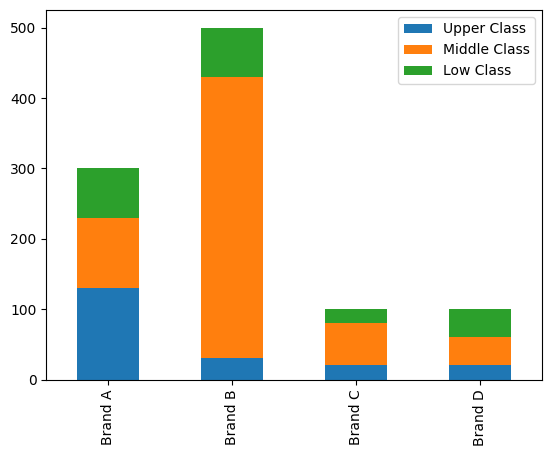

There is more than enough evidence to
reject H0 - the brand choice is very much dependent on social class.

### Example from health data

In [90]:
O = pd.crosstab(mydata.substance, mydata.sex, margins=False)
O

sex,female,male
substance,,
alcohol,36,141
cocaine,41,111
heroin,30,94


<AxesSubplot: xlabel='substance'>

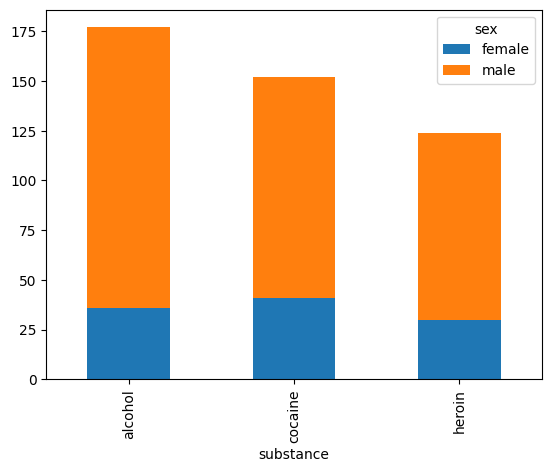

In [93]:
O.plot.bar(stacked=True)

In [92]:
chi_val, p_val, dof, E = chi2_contingency(O,correction=False)
chi_val,p_val,dof,E

(2.026361310095283,
 0.36306236500675976,
 2,
 array([[ 41.80794702, 135.19205298],
        [ 35.90286976, 116.09713024],
        [ 29.28918322,  94.71081678]]))

$\chi^2 = 2.026$ is very small resulting in a large $\text{p-value}= 0.363 > 0.05$. 
Therefore, there is not enough evidence to reject H0 -substance is independent of gender. The stacked bar plot above
shows it as well.